In [ ]:
pip install quickdraw

In [ ]:
from quickdraw import QuickDrawData, QuickDrawDataGroup
from pathlib import Path

image_size = (100, 100)

def generate_class_images(name, max_drawings, recognized):
    directory = Path("dataset2/" + name)

    if not directory.exists():
        directory.mkdir(parents=True)

    images = QuickDrawDataGroup(name, max_drawings=max_drawings, recognized=recognized)
    for img in images.drawings:
        filename = directory.as_posix() + "/" + str(img.key_id) + ".png"
        img.get_image(stroke_width=3).resize(image_size).save(filename)

categories =[
    "ant",
    "bat",
    "bear",
    "bee",
    "butterfly",
    "camel",
    "cat",
    "cow",
    "crab",
    "crocodile",
    "dog",
    "dolphin",
    "dragon",
    "duck",
    "elephant",
    "fish",
    "flamingo",
    "frog",
    "giraffe",
    "hedgehog",
    "horse",
    "kangaroo",
    "lion",
    "lobster",
    "monkey",
    "mosquito",
    "mouse",
    "octopus",
    "owl",
    "panda",
    "parrot",
    "penguin",
    "rabbit",
    "raccoon",
    "rhinoceros",
    "scorpion",
    "sea turtle",
    "shark",
    "sheep",
    "snail",
    "snake",
    "spider",
    "squirrel",
    "swan",
    "tiger",
    "whale",
    "zebra"
]

for label in QuickDrawData().drawing_names:
    if label in categories:
        generate_class_images(label, max_drawings=1200, recognized=True)

loading ant drawings
load complete
loading bat drawings
load complete
loading bear drawings
load complete
loading bee drawings
load complete
loading butterfly drawings
load complete
loading camel drawings
load complete
loading cat drawings
load complete
loading cow drawings
load complete
loading crab drawings
load complete
loading crocodile drawings
load complete
loading dog drawings
load complete
loading dolphin drawings
load complete
loading dragon drawings
load complete
loading duck drawings
load complete
loading elephant drawings
load complete
loading fish drawings
load complete
loading flamingo drawings
load complete
loading frog drawings
load complete
loading giraffe drawings
load complete
loading hedgehog drawings
load complete
loading horse drawings
load complete
loading kangaroo drawings
load complete
loading lion drawings
load complete
loading lobster drawings
load complete
loading monkey drawings
load complete
loading mosquito drawings
load complete
loading mouse drawings
lo

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
# Define parameters
dataset_dir = "./dataset2"  # Replace with the path to your dataset
image_size = (100, 100)  # Example image size
batch_size = 32

# Create training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    color_mode="grayscale",
    image_size=image_size,
    batch_size=batch_size
)

# Create validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    color_mode="grayscale",
    image_size=image_size,
    batch_size=batch_size
)


Found 56400 files belonging to 47 classes.
Using 45120 files for training.
Found 56400 files belonging to 47 classes.
Using 11280 files for validation.


Training dataset size: 1410 batches
Validation dataset size: 353 batches


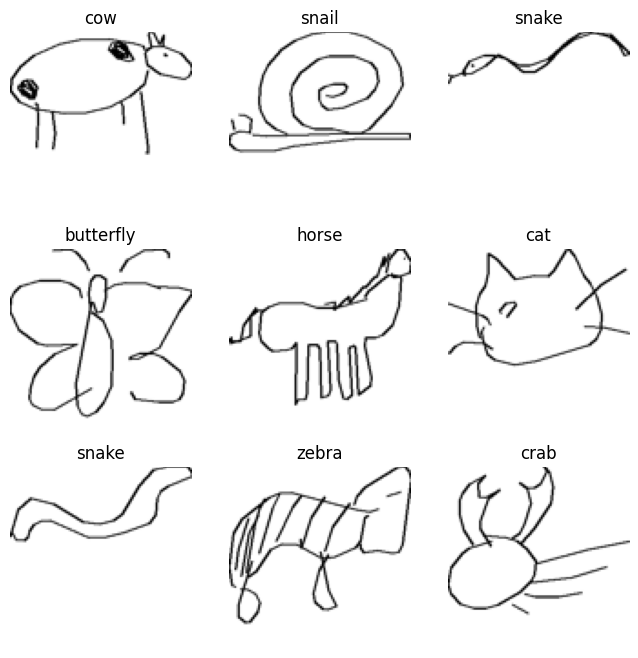

In [ ]:
plt.figure(figsize=(8, 8))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        data = images[i].numpy().astype("uint8")
        plt.imshow(data, cmap='gray', vmin=0, vmax=255)
        plt.title(train_ds.class_names[labels[i]])
        plt.axis("off")

print(f"Training dataset size: {len(train_ds)} batches")
print(f"Validation dataset size: {len(val_ds)} batches")

In [ ]:

from tensorflow.keras import Sequential
from tensorflow.keras.layers import (Rescaling, BatchNormalization, Conv2D, MaxPooling2D, Flatten, Dense, Dropout)
n_classes = 47
input_shape = (100, 100, 1)

model = Sequential([
    Rescaling(1. / 255, input_shape=input_shape),
    BatchNormalization(),

    Conv2D(6, kernel_size=(3, 3), padding="same", activation="relu"),
    Conv2D(8, kernel_size=(3, 3), padding="same", activation="relu"),
    Conv2D(10, kernel_size=(3, 3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(700, activation="relu"),
    BatchNormalization(),
    Dropout(0.2),

    Dense(500, activation="relu"),
    BatchNormalization(),
    Dropout(0.2),

    Dense(400, activation="relu"),
    Dropout(0.2),

    Dense(n_classes, activation="softmax")
])




/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
import os
import datetime
from tensorflow.keras.callbacks import TensorBoard

epochs = 7

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(logdir, histogram_freq=1)

# Compile the model before training
model.compile(optimizer='adam',  # Choose an optimizer, like 'adam'
              loss='sparse_categorical_crossentropy',  # Choose a loss function
              metrics=['accuracy'])  # Choose metrics to track
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    verbose=1,
    callbacks=[tensorboard_callback]
)

Epoch 1/7
1410/1410 ━━━━━━━━━━━━━━━━━━━━ 1348s 953ms/step - accuracy: 0.2792 - loss: 2.8078 - val_accuracy: 0.5187 - val_loss: 1.7103
Epoch 2/7
1410/1410 ━━━━━━━━━━━━━━━━━━━━ 1410s 959ms/step - accuracy: 0.5218 - loss: 1.6924 - val_accuracy: 0.5121 - val_loss: 1.7745
Epoch 3/7
1410/1410 ━━━━━━━━━━━━━━━━━━━━ 1387s 948ms/step - accuracy: 0.6370 - loss: 1.2498 - val_accuracy: 0.5457 - val_loss: 1.7553
Epoch 4/7
1410/1410 ━━━━━━━━━━━━━━━━━━━━ 1389s 980ms/step - accuracy: 0.7353 - loss: 0.8737 - val_accuracy: 0.5243 - val_loss: 2.1434
Epoch 5/7
1410/1410 ━━━━━━━━━━━━━━━━━━━━ 1425s 998ms/step - accuracy: 0.8179 - loss: 0.5825 - val_accuracy: 0.5165 - val_loss: 2.3486
Epoch 6/7
1410/1410 ━━━━━━━━━━━━━━━━━━━━ 1444s 985ms/step - accuracy: 0.8664 - loss: 0.4243 - val_accuracy: 0.5062 - val_loss: 2.6707
Epoch 7/7
1410/1410 ━━━━━━━━━━━━━━━━━━━━ 0s 942ms/step - accuracy: 0.8918 - loss: 0.3380

In [ ]:
import os
os.makedirs('./models', exist_ok=True)
model.save('./models/model_' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + '.keras')

NameError: name 'model' is not defined

In [ ]:
# Convert the model
converter = tf.lite.TFLiteConverter.from_keras_model(model) # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)




Saved artifact at '/tmp/tmp_us_fwak'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='keras_tensor_18')
Output Type:
  TensorSpec(shape=(None, 47), dtype=tf.float32, name=None)
Captures:
  134893887687952: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134893887687568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134893887688144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134893887688912: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134893887689296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134893887690448: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134893887690640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134893887691216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134893887691408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134893887691984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134893887692

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('./models/model_20250118-082202.keras')  # Replace with your model's path

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the image and resize to 28x28 pixels
img_path = '/content/Creation_Image_1737194565762_1.png'  # Replace with the path to your image
img = image.load_img(img_path, target_size=(100,100), color_mode='grayscale')

# Convert the image to a numpy array
img_array = image.img_to_array(img)
# img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

img_converted = image.array_to_img(img_array)
img_converted.save('/content/sean_snake.png')

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image, ImageOps

# Load the image
img_path = '/content/marcus_flamingo_original.png'  # Replace with the path to your image
img = image.load_img(img_path, color_mode='grayscale')

# Convert the image to a PIL image (to use ImageOps)
img_pil = Image.fromarray(np.uint8(img))

# Add padding to make the image square (if necessary)
img_pil = ImageOps.pad(img_pil, (100, 100), color='white')

# Convert the image back to array format for saving
img_array = image.img_to_array(img_pil)

# Convert back to image and save
img_converted = image.array_to_img(img_array)
img_converted.save('/content/marcus_flamingo.png')

In [ ]:
img_array = image.img_to_array(img_pil)
img_array = np.expand_dims(img_array, axis=0)

# Make a prediction
prediction = model.predict(img_array)[0]

print(f"Prediction: {prediction}")


# Create a SortedDict
unsorted_dict = {}
for idx, pred in enumerate(prediction):
    unsorted_dict[pred] = idx

sorted_dict = {k: v for k, v in sorted(unsorted_dict.items(), reverse=True)}
# Print the sorted dictionary
for key, value in sorted_dict.items():
    print(f"{categories[value]}: {key}")


# # Get the class with the highest probability
# predicted_class = np.argmax(prediction)

# print(f"Predicted class: {predicted_class}")

# # Print the class name
# print(f"Predicted class name: {categories[predicted_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
Prediction: [5.07487450e-03 1.58501160e-03 2.30983756e-02 1.62676629e-02
 3.76835326e-03 9.80191089e-06 1.97976967e-03 5.40320389e-02
 6.68564535e-05 1.07729854e-03 1.32068526e-02 1.53918318e-05
 6.88766921e-03 2.73162186e-05 1.41915667e-03 7.77089463e-06
 2.99437874e-04 3.77352652e-03 1.19603079e-04 1.27865270e-01
 7.12254259e-05 4.65751946e-05 6.03855180e-04 1.11680394e-02
 1.67920664e-02 5.66559546e-02 1.99071448e-02 1.14673785e-05
 9.17011523e-04 2.79011000e-02 2.52264399e-05 9.99264785e-07
 8.76816176e-03 3.92130315e-01 2.97562056e-03 6.99766912e-03
 1.09028234e-03 4.19743010e-05 9.90799908e-03 8.35377705e-06
 1.23731627e-06 7.95855303e-04 4.77175636e-04 5.00558643e-04
 1.80276304e-01 7.76722038e-04 5.68940304e-04]
raccoon: 0.3921303153038025
tiger: 0.1802763044834137
hedgehog: 0.127865269780159
mosquito: 0.05665595456957817
cow: 0.054032038897275925
panda: 0.027901099994778633
bear: 0.023098375648260117
mouse: 0.019907144829630852
monkey: 0.0